## Importing packages
If you are working with a notebook, it is a good practice to import all the packages that you need at the top of the notebook. This will automatically give you a rough idea of what the notebook is about, and you will avoid random package imports throughout the notebook.

- Import the three packages you have used so far with their correct renaming conventions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading csv files
The package pandas introduces the function `pd.read_csv()` that allows you to turn a csv file directly into a data frame. Depending on the specific format of the csv file, you have to use quite a few arguments to `pd.read_csv()` to read the csv file without any errors. See the following arguments that are useful/required to load the temperature csv files:
- `sep`: separator of the data columns, this will be a comma in most cases but sometimes this is also a semicolon
- `decimal`: decimal character for numerical data, this will be a comma if the file uses a "German" number format
- `names`: list of names to use for the columns, use this if the column names are not (well) specified in the csv file
- `usecols`: list of columns to use, if there are six columns in the csv file but you don't need the first and the last one, use `[1, 2, 3, 4]`
- `index_col`: specify the column to be used as the index, this is applied after `usecols`
- `skiprows`: skip the specified number/list of rows before starting to read the data columns, use this if there is some metadata at the top of your csv file
- `header`: index of the row where the column names are specified, this is counted after applying `skiprows`
- `nrows`: specify the number of rows to load, use this if you only want to load the entire csv file at once
- `encoding`: to save text in a file you need an encoding that specifies how strings are transformed to bytes, the default here should be `"utf-8"`

In any case, you should always open a csv file in an editor first to check the format. Unless you already know the arguments for the specific format, this will always be quicker than trying to blindly read the file with pandas.

- Look at the csv file for the power consumption data in editor. What is used as the `delimiter` and the `decimal`? Do you have to skip any rows?
- Use the argument `index_col` to directly use the time data as the index.
- Specify the number of columns before loading the data frame or remove the empty column after loading the file.
- Manually set the column names or rename the columns to get rid of the unit `[kW]` in the column names.

In [2]:
# the separator is ";" instead of a comma ","
# the decimal point is a comma ","
# the column "time" is supposed to be the index
df = pd.read_csv("energy-3204_oct2022-2023.csv", sep=";", index_col="time", decimal=",")

In [3]:
# drop the weird and empty column at the end of the data frame
# the alternative would be to use the argument usecols=[0, 1, 2, 3] in pd.read_csv()
df.drop("Unnamed: 5", axis="columns", inplace=True)

In [4]:
# remove the unit [kW] from the column names
columns = [column.split("[")[0] for column in df.columns]
df.columns = columns

## Converting the index to datetime objects
The index of the data frame already looks like a datetime but these are actually just strings. If you want to properly use the index column, you have to convert it to datetime objects. Pandas provides the function `pd.to_datetime()` that will try to interpret strings/numbers as datetime objects. It might be necessary to further specify the format since this is often stored in the local time format. E.g. in Germany we use the format `day.month.year` whereas the everyday format in the US is `month/day/year`. As long as the format does not change throughout the data frame, you can always find a way to convert this to datetime objects. It might however be necessary to manually specify the datetime format. Look at the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) to learn more about the options to interpret strings/numbers as datetime objects.

- Convert the index of the data frame to a DatetimeIndex with the function `pd.to_datetime()`. You can directly reassign the DatetimeIndex to `df.index`.
- What is the type of the individual values in the DatetimeIndex? Find out how you can get the hour, minute, day of week from an individual value  and from the entire DatetimeIndex.
- EXTRA: Add the `hour` and the `dayofweek` of every value in the DatetimeIndex as new columns to the data frame. This will allow easier grouping/querying of the data.

In [5]:
# create a DatetimeIndex from the string index
df.index = pd.to_datetime(df.index)

In [6]:
ts = df.index[0]
ts, type(ts)

(Timestamp('2022-10-01 09:00:00'), pandas._libs.tslibs.timestamps.Timestamp)

In [7]:
ts.hour, ts.minute, ts.dayofweek

(9, 0, 5)

In [8]:
# save the hours and the day of the week in additional columns, this will allow easier grouping/querying
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek

## Power consumption over one week
You can index the time with a string (range) to select only a fraction of the data frame. If you only want to index the time by the days, you can omit the hours. The hours will then default to midnight of the respective days. See the following example to select all rows from the days `"2023-10-01"` and `"2023-10-02"`:
```python
df.loc["2023-10-01":"2023-10-02"]
```
For such a time range, the stop will now be included. If you look at the rows in the data frame selection above, the column time will go from `2023-10-01 00:00:00` to `2023-10-02 23:00:00`.

- Reproduce the example above to get the data for two days. Change the index range such that the data only starts at noon on the first day.
- Select the data from the last week (starting on `"2023-10-09"`) and plot the column `"P_tot"`. There should be five peaks in your data and two constant days. Label the axes (change the xlabel if you don't like it) and add a title.
- Look at the data from one week earlier (starting on `"2023-10-02"`) and plot the column `"P_tot"` again. Why does the second day of the week have a much smaller power consumption?

In [9]:
# there should be 48 columns in the new data frame
df.loc["2023-10-01":"2023-10-02"]

,P1,P2,P3,P_tot,hour,dayofweek
time,,,,,,
2023-10-01 00:00:00,98.193211,96.207589,87.476166,281.884768,0,6
2023-10-01 01:00:00,98.169967,96.719734,87.186740,282.076405,1,6
2023-10-01 02:00:00,97.992864,96.498433,87.259320,281.750634,2,6
2023-10-01 03:00:00,97.388837,96.124617,86.796866,280.311239,3,6
2023-10-01 04:00:00,97.410749,96.702541,87.493571,281.606780,4,6
2023-10-01 05:00:00,97.576406,96.722945,87.353517,281.648414,5,6
2023-10-01 06:00:00,97.643406,96.544641,88.007302,282.191007,6,6
2023-10-01 07:00:00,97.925002,96.542735,87.891284,282.358960,7,6
2023-10-01 08:00:00,97.982032,96.644263,88.119988,282.749145,8,6


In [10]:
# add the time 12:00 to the start of the range, the data frame should now be reduced to 36 rows
df.loc["2023-10-01 12:00":"2023-10-02"]

,P1,P2,P3,P_tot,hour,dayofweek
time,,,,,,
2023-10-01 12:00:00,98.824011,97.399509,88.403923,284.627352,12,6
2023-10-01 13:00:00,99.095469,97.613114,88.322293,285.034245,13,6
2023-10-01 14:00:00,98.171185,97.527503,88.032579,283.729524,14,6
2023-10-01 15:00:00,97.378308,97.059138,87.854166,282.285186,15,6
2023-10-01 16:00:00,96.741441,96.756923,87.851480,281.342304,16,6
2023-10-01 17:00:00,97.168363,95.742398,87.613964,280.521982,17,6
2023-10-01 18:00:00,97.372459,95.199291,88.422263,280.994040,18,6
2023-10-01 19:00:00,97.868822,95.431084,88.196321,281.497330,19,6
2023-10-01 20:00:00,97.946099,95.980035,88.947377,282.870934,20,6


Text(0.5, 1.0, 'Total power consumption over one week')

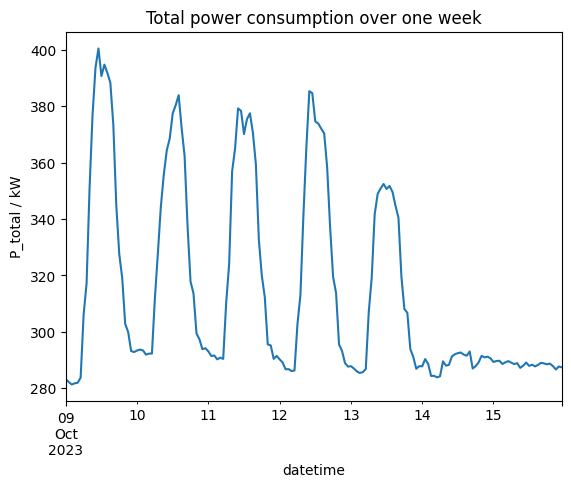

In [11]:
# from Monday to Friday the power consumption changes a lot during the day
# on Saturday and Sunday the power consumption is constant
df.loc["2023-10-09":"2023-10-15"]["P_tot"].plot()
plt.xlabel("datetime")
plt.ylabel("P_total / kW")
plt.title("Total power consumption over one week")

Text(0.5, 1.0, 'Total power consumption over one week with a national holiday')

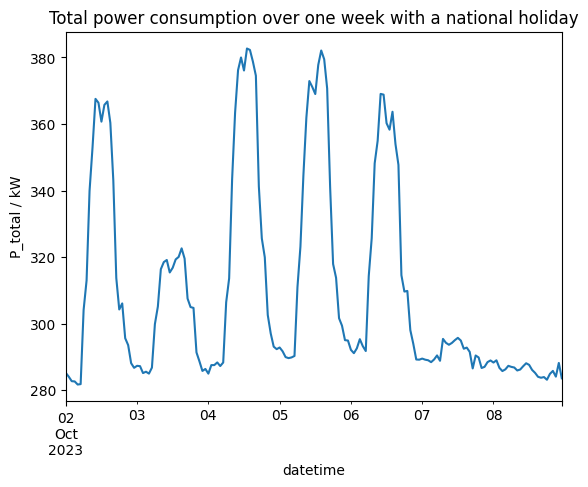

In [12]:
# 2023-10-03 was the national holiday "Tag der Deutschen Einheit" or "German Unity Day"
df.loc["2023-10-02":"2023-10-08"]["P_tot"].plot()
plt.xlabel("datetime")
plt.ylabel("P_total / kW")
plt.title("Total power consumption over one week with a national holiday")

## Highest power consumption during the day/night
For this exercise you can assume that the day lasts from 07:00 to 22:00 (including 22:00) and the night lasts from 23:00 to 06:00 (including 06:00). Define two query strings that represent these conditions. As an example, if your column is called `"hour"`, you would use the following query to select everything up to 12:00 (including 12:00)
```python
query_morning = "hour <= 12"
df.query(query_morning)
```
You can combine conditions with `and`/`or`. The usage of parentheses in the queries is optional if you only have two conditions. You can however always use them to improve the readability of the queries.  

- Apply the two queries for the day and the night to the data frame. What is the maximum value of the column `"P_tot"` during the day/the night?
- Find the index/timestamp where the highest power consumptions were measured with the method `.idxmax()`. Save these data points in new variables for later use. They should be on the days `"2023-05-11"` and `"2023-05-12"`.
- Display the total power consumption in the range from `"2023-05-10"` to `"2023-05-13"`. Add the maximum data points to the plot with `plt.scatter()` and label them. Use different marker shapes or different colors for the day/night maximum.
- If you look at the maximum data point of the night in the plot, would you use different time ranges to separate the day and the night?

In [13]:
# define the queries to include the interval limits
query_day = "(hour >= 7) and (hour <= 22)"
query_night = "(hour >= 23) or (hour <= 6)"

In [14]:
df.query(query_day)["P_tot"].max(), df.query(query_night)["P_tot"].max()

(np.float64(422.67168256587325), np.float64(346.18100480067494))

In [15]:
max_point_day = df.loc[df.query(query_day)["P_tot"].idxmax()]
max_point_night = df.loc[df.query(query_night)["P_tot"].idxmax()]

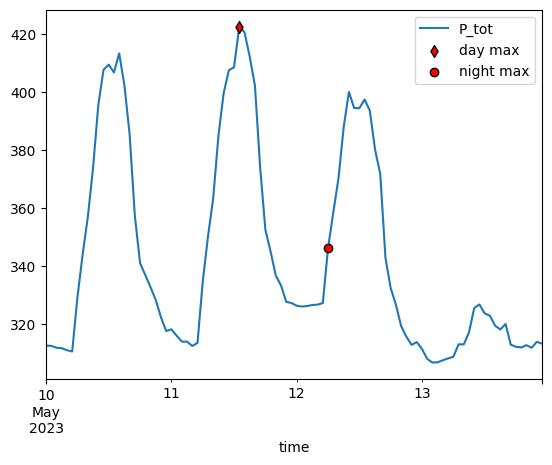

In [16]:
# the plot suggests that the range for the night is too long, the nightly maximum is clearly not part of the nightly baseline anymore
df["2023-05-10":"2023-05-13"]["P_tot"].plot()
# use zorder=2 to display the markers on top of the line plot
plt.scatter(max_point_day.name, max_point_day.P_tot, marker="d", color="r", edgecolor="k", label="day max", zorder=2)
plt.scatter(max_point_night.name, max_point_night.P_tot, marker="o", color="r", edgecolor="k", label="night max", zorder=2)
plt.legend()

## Power consumption as a function of the hour
If you look at the power consumption over a few days, you can clearly see that the consumption varies a lot throughout a regular weekday. To take a closer look at the average changes over a day, you want to group all the data by the column `"hour"`. You can then compute the average of the columns per unique value of the `"hour"`. The averaged data frame will then have the `"hour"` as the index.

- Use the column `"dayofweek"` to write a query that selects only the weekdays. If you are not sure on which day the week starts, look at the data from this week and compare the dates to the values in the column `"dayofweek"`.
- How many data points did you remove from the original data frame with the weekday query?
- Select only the weekdays with a query and use the data frame method `.groupby()` to group the data by the column `"hour"`, and store this group as a new variable. You can then use the method `.mean()` to directly compute the mean values of all data frame columns for each hour.

In [17]:
# the week starts on Monday with the value 0
weekday_query = "dayofweek < 5"

In [18]:
# compare the lengths after applying the weekday query
len(df), len(df.query(weekday_query)), len(df) - len(df.query(weekday_query))

(9094, 6464, 2630)

In [19]:
# group the data by the "hour" column
hour_group = df.query(weekday_query).groupby("hour")

In [20]:
# compute the mean for each column in the data frame for each hour
hour_mean = hour_group.mean()

<Axes: xlabel='hour'>

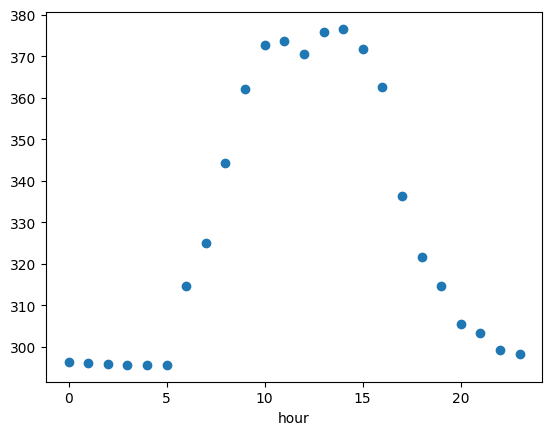

In [21]:
# display the total power column with the hour as the x-values
hour_mean["P_tot"].plot(marker="o", linestyle="none")

In [22]:
# compute the mean, the standard deviation and the standard error of the total power consumption column
# https://www.geeksforgeeks.org/how-to-plot-mean-and-standard-deviation-in-pandas/
# there is a FutureWarning that suggests to use "mean" and "std" instead of np.mean and np.std
P_tot = hour_group["P_tot"].agg(["mean", "std", "sem"])

<Axes: xlabel='hour', ylabel='mean'>

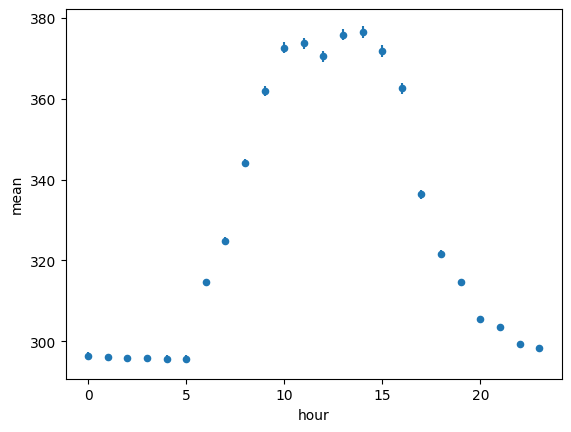

In [23]:
# use the argument "yerr" to include the standard deviation/standard error as error bars
P_tot.reset_index().plot("hour", "mean", "scatter", yerr="sem")